In [1]:
import pandas as pd
import numpy as np

In [3]:
dictionary = pd.read_csv("dictionary.csv")
dictionary.rename(columns={'A': 'English', 'Unnamed: 1': 'Hindi', 'Unnamed: 2': 'Garhwali'}, inplace=True)

In [4]:
dictionary

,English,Hindi,Garhwali
0,a,एक,क्वी
1,aback,पैर,तैयार
2,abandon,बुटीद्र,ढुक्राणू
3,abandoned,धुर्या,पातर
4,abase,बेइज्जत करपू,नाकदरि करणू
...,...,...,...
7593,zip,बंदूकै गोळि,बंदूक की गोली
7594,zodiac,रॉंस्यूकु चक्कर,राशि-चक्र
7595,zone,छेत्तर,इलाकु
7596,zoo,चिड़ियाघर,चिड़ियाघर


In [15]:
dictionary = dictionary[dictionary.Garhwali != '-']
dictionary = dictionary[dictionary.English != '-']
dictionary = dictionary[dictionary.Hindi != '-']

In [24]:
dictionary = dictionary.dropna()

In [5]:
import nltk
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/kawaii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
garhwali_words = list(dictionary['Garhwali'])
english_translations = list(dictionary['English'])

synsets_dict = {}

for word, translation in zip(garhwali_words, english_translations):
    synsets = wn.synsets(translation)
    synsets_dict[word] = synsets

In [93]:
garhwali_words

['क्वी',
 'तैयार',
 'ढुक्राणू',
 'पातर',
 'नाकदरि करणू',
 'अपमान',
 'डाल',
 'कुयाम',
 'कम करना',
 'न्यूनता अल्पता',
 'बूचड़खाना',
 'भी',
 'ईसाई मत',
 'महन्त',
 'शब्द को संशिप्त',
 'त्यागन',
 'सिंहासन का त्याग',
 'पेट घे बोट जदर पे',
 'लबड़कु',
 'हरेणो',
 'सेज पर',
 'धर्म भ्रष्ट',
 'सनमार्ग से हटना',
 'बहकाव',
 'घिणाणू',
 'झिड़झिड़ी',
 'घिनौना',
 'बात मानणू',
 'सामर्थ',
 'अधम',
 'नीचता',
 'लैख',
 'शर्माते हुए',
 'त्यागना',
 'अनघड़:',
 'जहाज या गाड़ी में सवार',
 'धैर घौडर',
 'अन्त',
 'घृणित',
 'घृणा',
 'आदिवासी',
 'गर्भपात होना',
 'गर्भपात',
 'निष्फल',
 'बिन्डि लगणू',
 'नजीक',
 'माथिन',
 'साफ',
 'निचोडणू',
 'रगड़',
 'घर्षण',
 'संक्षेप करना',
 'सार',
 'परदेस मा ',
 'अचानक',
 'अकस्मात',
 'पवाडा ',
 'बुकिक ',
 'गायब',
 'नदारद',
 'लापता',
 'नागा',
 'सरपता',
 'अनुपस्थित व्यक्ति',
 'मुलक्कड',
 'ना तोल',
 'नेति',
 'मुक्त करना',
 'समाणू',
 'एकाग्रचित्त',
 'चुखाणौ काम',
 'चुसणु ',
 'मिताहारी',
 'परहेज',
 'अंट-शंट',
 'घिमसाण',
 'भौत',
 'कुबाक',
 'गाळि देणू',
 'गलेर गाली देने वाला',
 'गाली देने वाला

In [30]:
synsets_dict

{'क्वी': [Synset('angstrom.n.01'),
  Synset('vitamin_a.n.01'),
  Synset('deoxyadenosine_monophosphate.n.01'),
  Synset('adenine.n.01'),
  Synset('ampere.n.02'),
  Synset('a.n.06'),
  Synset('a.n.07')],
 'तैयार': [Synset('ready.n.01'),
  Synset('cook.v.02'),
  Synset('fix.v.12'),
  Synset('ready.a.01'),
  Synset('ready.s.02'),
  Synset('ready.s.03'),
  Synset('ready.s.04'),
  Synset('quick.s.04')],
 'ढुक्राणू': [Synset('abandon.n.01'),
  Synset('wildness.n.01'),
  Synset('abandon.v.01'),
  Synset('abandon.v.02'),
  Synset('vacate.v.02'),
  Synset('abandon.v.04'),
  Synset('abandon.v.05')],
 'पातर': [Synset('sympathizer.n.02')],
 'नाकदरि करणू': [Synset('humiliate.v.01')],
 'अपमान': [Synset('insult.n.02'), Synset('diss.v.01')],
 'डाल': [Synset('embarrass.v.01')],
 'कुयाम': [],
 'कम करना': [Synset('consume.v.05')],
 'न्यूनता अल्पता': [Synset('suspension.n.04'), Synset('abatement.n.02')],
 'बूचड़खाना': [Synset('abattoir.n.01')],
 'भी': [Synset('besides.r.02')],
 'ईसाई मत': [Synset('abbey.n.

In [31]:
class LRL_Synset:
    def __init__(self, name, words, definition, hypernyms=None, hyponyms=None):
        self.name = name
        self.words = words
        self.definition = definition
        self.hypernyms = hypernyms if hypernyms else []
        self.hyponyms = hyponyms if hyponyms else []

In [32]:
lrl_synsets = {}
for word, synsets in synsets_dict.items():
    for synset in synsets:
        name = synset.name()
        words = [word]  
        definition = synset.definition()
        hypernyms = [hypernym.name() for hypernym in synset.hypernyms()]
        hyponyms = [hyponym.name() for hyponym in synset.hyponyms()]
        
        if name not in lrl_synsets:
            lrl_synsets[name] = LRL_Synset(name, words, definition, hypernyms, hyponyms)
        else:
            lrl_synsets[name].words.append(word)

In [35]:
for synset in list(lrl_synsets.values())[0:10]:
    print(f"Synset: {synset.name}")
    print(f"Words: {synset.words}")
    print(f"Definition: {synset.definition}")
    print(f"Hypernyms: {synset.hypernyms}")
    print(f"Hyponyms: {synset.hyponyms}")
    print()

Synset: angstrom.n.01
Words: ['क्वी']
Definition: a metric unit of length equal to one ten billionth of a meter (or 0.0001 micron); used to specify wavelengths of electromagnetic radiation
Hypernyms: ['metric_linear_unit.n.01']
Hyponyms: []

Synset: vitamin_a.n.01
Words: ['क्वी']
Definition: any of several fat-soluble vitamins essential for normal vision; prevents night blindness or inflammation or dryness of the eyes
Hypernyms: ['fat-soluble_vitamin.n.01']
Hyponyms: ['vitamin_a1.n.01', 'vitamin_a2.n.01']

Synset: deoxyadenosine_monophosphate.n.01
Words: ['क्वी']
Definition: one of the four nucleotides used in building DNA; all four nucleotides have a common phosphate group and a sugar (ribose)
Hypernyms: ['nucleotide.n.01']
Hyponyms: []

Synset: adenine.n.01
Words: ['क्वी']
Definition: (biochemistry) purine base found in DNA and RNA; pairs with thymine in DNA and with uracil in RNA
Hypernyms: ['purine.n.01']
Hyponyms: []

Synset: ampere.n.02
Words: ['क्वी']
Definition: the basic unit 

## Visualization

In [36]:
synset_to_idx = {}
idx = 0


#map synset to index
for synsets in synsets_dict.values():
    for synset in synsets:
        if synset.name() not in synset_to_idx:
            synset_to_idx[synset.name()] = idx
            idx += 1


# Create an embedding matrix where each row corresponds to a synset
embedding_matrix = np.zeros((len(synset_to_idx), len(synset_to_idx)))


# Populate the embedding matrix based on hypernym relationships
for synset_name, synset_idx in synset_to_idx.items():
    synset = wn.synset(synset_name)
    for hypernym in synset.hypernyms():
        if hypernym.name() in synset_to_idx:
            hypernym_idx = synset_to_idx[hypernym.name()]
            embedding_matrix[synset_idx, hypernym_idx] = 1

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_matrix)

In [56]:
reduced_embeddings.shape

(20081, 3)

In [58]:
reduced_embeddings[4]

array([-0.00640044, -0.00381567, -0.00478295])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


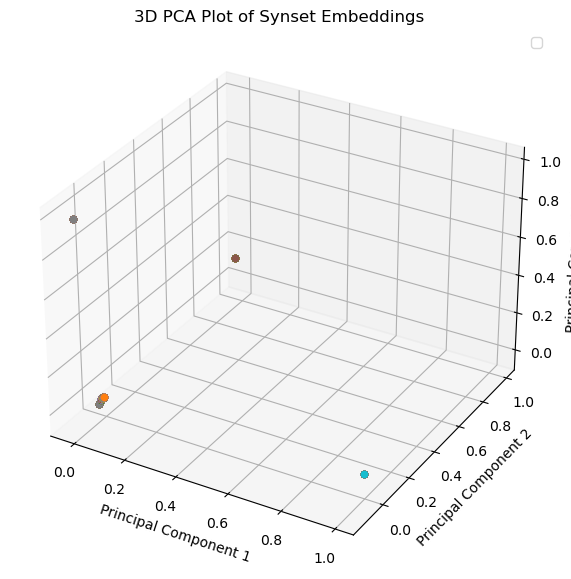

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each point
for word, synsets in synsets_dict.items():
    for synset in synsets:
        synset_name = synset.name()
        synset_idx = synset_to_idx[synset_name]
        ax.scatter(reduced_embeddings[synset_idx, 0], reduced_embeddings[synset_idx, 1], reduced_embeddings[synset_idx, 2])
        #ax.text(reduced_embeddings[synset_idx, 0], reduced_embeddings[synset_idx, 1], reduced_embeddings[synset_idx, 2], word)

# Set plot labels
ax.set_title('3D PCA Plot of Synset Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

In [86]:
def print_synset_info(lrl_word, synset_dict):
    found = False
    for synset, info in synset_dict.items():
        if lrl_word == synset:
            found = True
            print(f"Synset: {synset}")
            print(f"Info: {info}")
            print()
    if not found:
        print("Word is not present")

In [97]:
print_synset_info('समाणू', synsets_dict)

Synset: समाणू
Info: [Synset('absorb.v.01'), Synset('absorb.v.02'), Synset('absorb.v.03'), Synset('absorb.v.04'), Synset('absorb.v.05'), Synset('absorb.v.06'), Synset('steep.v.01'), Synset('absorb.v.08'), Synset('absorb.v.09')]



In [83]:
for synset, info in synsets_dict.items():
    print(synset)

क्वी
तैयार
ढुक्राणू
पातर
नाकदरि करणू
अपमान
डाल
कुयाम
कम करना
न्यूनता अल्पता
बूचड़खाना
भी
ईसाई मत
महन्त
शब्द को संशिप्त
त्यागन
सिंहासन का त्याग
पेट घे बोट जदर पे
लबड़कु
हरेणो
सेज पर
धर्म भ्रष्ट
सनमार्ग से हटना
बहकाव
घिणाणू
झिड़झिड़ी
घिनौना
बात मानणू
सामर्थ
अधम
नीचता
लैख
शर्माते हुए
त्यागना
अनघड़:
जहाज या गाड़ी में सवार
धैर घौडर
अन्त
घृणित
घृणा
आदिवासी
गर्भपात होना
गर्भपात
निष्फल
बिन्डि लगणू
नजीक
माथिन
साफ
निचोडणू
रगड़
घर्षण
संक्षेप करना
सार
परदेस मा 
अचानक
अकस्मात
पवाडा 
बुकिक 
गायब
नदारद
लापता
नागा
सरपता
अनुपस्थित व्यक्ति
मुलक्कड
ना तोल
नेति
मुक्त करना
समाणू
एकाग्रचित्त
चुखाणौ काम
चुसणु 
मिताहारी
परहेज
अंट-शंट
घिमसाण
भौत
कुबाक
गाळि देणू
गलेर गाली देने वाला
गाली देने वाला
गढडा
सैमत होणू
गति तेज करना
लैजु
ढौळ
झल्लि
अँग्यूणू
स्वीकार योग्य
स्वीकार
अभिगम
संयोग
आकस्मिक
अम्ल होना
जय-जयकार करना
चढ़ाई
निभौणू
जगा
साथि
संगत करणू
दगड्या
पुर्याणू
ग्यानि
 दक्षता
हामि भरणू
इक जनि
वे हिसाब से
कुशल-क्षेम पूछना
खाता
वजै बताणू
उत्तरदायी
मुनीम
थाँगडू
 हिसाब-किताब
विश्वास करना
अनेक वस्तुओं क एक साथ वृद्धि
ब